<a href="https://colab.research.google.com/github/RodrigoSantosB/project-machine-learning/blob/main/ProjetoAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Previsão usando diferentes algoritmos** 🤯
---


## **Alunos**:
* Rodrigo Santos Batista – rsb6@cin.ufpe.br
* João Pedro Ribeiro da Silva Dias - jprsd@cin.ufpe.br

CIn ­ UFPE

## **Projeto**:

Modelo preditivo com:
- **Arvores de decisão**
- **Bayesiano ingenuo**
- **Regressão logística**
- **K-vizinhos**

## **Professor**:

Francisco de Assis Tenorio de Carvalho

CIn ­ UFPE


## **Import the data-base**

---




In [1]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')



from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
df0 = pd.read_csv('/content/drive/MyDrive/Aprendizado de máquina/wdbc.data')




names = ['ID','Diagnosis','radius1','texture1','perimeter1','area1',
               'smoothness1','compactness1','concavity1','concave_points1',
               'symmetry1','fractal_dimension1','radius2','texture2',
               'perimeter2','area2','smoothness2','compactness2','concavity2',
               'concave_points2','symmetry2','fractal_dimension2','radius3',
               'texture3','perimeter3','area3','smoothness3','compactness3',
               'concavity3','concave_points3','symmetry3','fractal_dimension3']

# Processo de nomeação das colunas
df0.columns = ['ID','Diagnosis','radius1','texture1','perimeter1','area1',
               'smoothness1','compactness1','concavity1','concave_points1',
               'symmetry1','fractal_dimension1','radius2','texture2',
               'perimeter2','area2','smoothness2','compactness2','concavity2',
               'concave_points2','symmetry2','fractal_dimension2','radius3',
               'texture3','perimeter3','area3','smoothness3','compactness3',
               'concavity3','concave_points3','symmetry3','fractal_dimension3']

# print(df0)

X = df0.drop('Diagnosis', axis=1)  # Recursos (excluindo a coluna 'Diagnosis')

# Variável target (a ser prevista)
y = df0['Diagnosis']  # Variável alvo (coluna 'Diagnosis')


# por que test_size = 0.3, pelo fato de que isso nos dá 70% da base para treino
# e 30% para test como pedido nas especificações
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## **Utils**


---



In [58]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.exceptions import UndefinedMetricWarning

# Ignorar os avisos específicos
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

# Normaliza os dados para produzior resultados mais consistentes
def data_preprocess(X_data,y_data):
  from sklearn.preprocessing import StandardScaler
  # divide os dados em um conjunto de treinamento e um conjunto de teste.
  X_train, X_test, y_train, y_test = train_test_split(X_data, y_data.values.ravel(), test_size=0.3, random_state=42)

  # padroniza as variáveis preditoras, transformando-as em média zero e variância unitária
  # Isso ajuda a evitar que uma variável com uma escala maior tenha mais influência
  # no modelo do que as outras variáveis.
  scaler = StandardScaler(copy=True, with_mean=True, with_std=True)

  # ajusta o scaler no conjunto de treinamento usando o método "fit"
  '''
   o ajuste é necessário para que a normalização dos dados seja feita
   corretamente no conjunto de treinamento, permitindo que o modelo
   generalize bem em novos dados.

  '''
  scaler.fit(X_train)

  # Agora aplica as transformações aos dados:
  # É feita para que que as variáveis tenham mesma escala e a mesma ordem de grandeza.
  train_scaled = scaler.transform(X_train)
  test_scaled = scaler.transform(X_test)
  return(train_scaled, test_scaled, y_train, y_test)


# Plota a matriz de confusão dos dados de teste e treino
def getResults(x_test, y_test, model, model_name='arv'):
  '''
  Args:
    x: pode ser x_test ou x_train
    y: pode ser y_test ou y_train
    model: modelo de treinamento que o conjunto de dados esta sendo submetido
    model_name: nome do modelo para visualizar a matrix de confusão
      ->'arv'    : árvore de decisão
      ->'baysian': Baysiano ingênuo
      ->'reglog' : Regressão logística
      ->'kviz"   : K-vizinhos

  Returns:
    Matrix de confusão do modelo passado

  '''

  def get_model(model_name):
    print("Modelo:", model_name)
    predicted = model.predict(x_test)
    print("Acurácia:", accuracy_score(y_test, predicted), "\n")

    # Matriz de Confusão
    cm = confusion_matrix(y_test, predicted)
    TP = cm[0][0] # True positive
    FP = cm[0][1] # False positive
    FN = cm[1][0] # False negative
    TN = cm[1][1] # True negative

    # Calculation of accuracy ( for to query effect)
    accuracy =  (TP + TN)/(TP + FP + FN + TN)

    labels = ['M = malignant','B = benign']

    plt.figure()
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', center=True)
    plt.title(f"Matriz de Confusão - {model_name}")
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
    plt.show()

    # Relatório de Classificação
    class_report = classification_report(y_test, predicted)
    print("\n############___Relatório de Classificação___############:\n")
    print(class_report)
    print("\n-------------------------------------------------------\n")


  if model_name == 'arv':
    name = "Árvore de Decisão"
    get_model(name)

  elif model_name == 'baysian':
    name = "Bayesiano Ingênuo"
    get_model(name)

  elif model_name == 'reglog':
    name = "Regressão Logística"
    get_model(name)

  elif model_name == 'kviz':
    name = "K-vizinhos"
    get_model(name)

  else:
    print("Unknow model\n")



# mostra o balanceamento do target em relação ao conjunto de dados
def showBalance(target="Diagnosis"):
  import seaborn as sns
  # Definindo cores para as barras
  colors = ["skyblue", "salmon"]

  # plt.figure(figsize=(8, 4))
  sns.countplot(data=df0, x=target, palette=colors)



  # Adicionando títulos
  plt.title("Número de casos Benigno e Maligno")
  plt.xlabel("Diagnóstico")
  plt.ylabel("Contagem")

  plt.show()


# Função que baleceia dos dados de treino do conjunto de dados para garantir que o modelo está performando bem
def cross_validation(model, X, y, oversampling=False):
  # Kfold do scikit-Learn
  from sklearn.model_selection import KFold
  from sklearn.metrics import accuracy_score
  from imblearn.over_sampling import SMOTE

  from statistics import mean


  # Returns the number of splitting iterations in the cross-validator
  kfold = KFold(n_splits=10)


  #listas de acurácias de cada split:
  accuracy_split = []

  # Iterando sobre os splits
  for idx, (idx_train, idx_validation) in enumerate(kfold.split(X)):
    X_split_train = X.iloc[idx_train, :]
    y_split_train = y.iloc[idx_train]

    # Oversample só no split de treine:
    if oversampling:
      sm = SMOTE(random_state=42)
      #balanceamento no treino
      X_split_train, y_split_train = sm.fit_resample(X_split_train, y_split_train)

    # Treinando modelo com dados balaceado só no treino
    model.fit(X_split_train, y_split_train.values.flatten())

    # Não aplicamo SMOT na validação
    X_split_validation = X.iloc[idx_validation, :]
    y_split_validation = y.iloc[idx_validation]

    #Validação SEM oversample (AMOSTRA com dados desbalanceados)
    predict_validation = model.predict(X_split_validation)

    accuracy = accuracy_score(y_split_validation, predict_validation)
    accuracy_split.append(accuracy)

    print(f"Accuracy do split {idx}: {accuracy}")

  return mean(accuracy_split)



## **Árvore de decisão**

---




### **Aplicando regressão sem pré-processamento**
 Hirperparametros padrão:

In [40]:
# Árvore de Decisão
dt_clf = DecisionTreeClassifier() #critério que o algorimo está usando entropia
dt_clf.fit(X_train, y_train)

dt_predictions = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Acurácia (Árvore de Decisão):", dt_accuracy)

Acurácia (Árvore de Decisão): 0.935672514619883


#### **Conjunto de teste**

---



Modelo: Árvore de Decisão
Acurácia: 0.935672514619883 



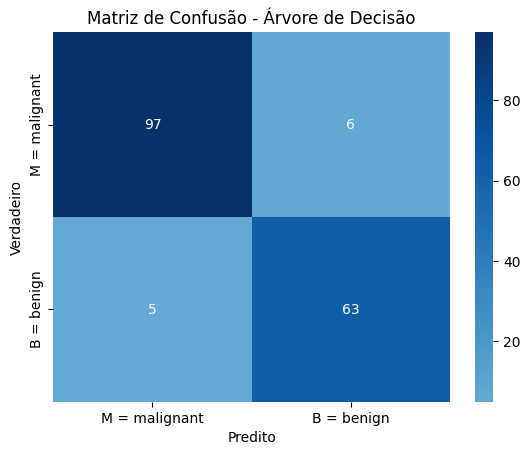


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.95      0.94      0.95       103
           M       0.91      0.93      0.92        68

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171


-------------------------------------------------------



In [41]:
# Matriz de confusão para o conjunto de teste
getResults(X_test, y_test, dt_clf, model_name='arv')

#### **Conjunto de treino**

---



Modelo: Árvore de Decisão
Acurácia: 1.0 



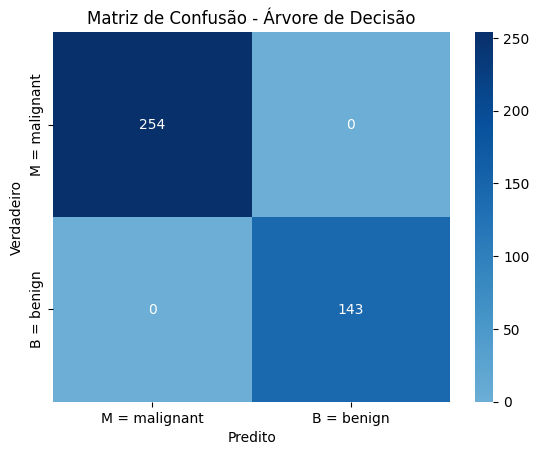


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       254
           M       1.00      1.00      1.00       143

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397


-------------------------------------------------------



In [42]:
# Matriz de confusão para o conjunto de teste
getResults(X_train, y_train, dt_clf, model_name='arv')

#### **Aplicando Oversampling no conjunto de treino**

---

In [46]:
mean_accuracy_without_smote = cross_validation(dt_clf, X_train, y_train)
print(mean_accuracy_without_smote)
print()
mean_accuracy_with_smote = cross_validation(dt_clf, X_train, y_train, oversampling=True)
mean_accuracy_with_smote

Accuracy do split 0: 0.975
Accuracy do split 1: 0.9
Accuracy do split 2: 0.975
Accuracy do split 3: 0.925
Accuracy do split 4: 0.925
Accuracy do split 5: 0.925
Accuracy do split 6: 0.875
Accuracy do split 7: 0.9230769230769231
Accuracy do split 8: 0.9487179487179487
Accuracy do split 9: 0.9487179487179487
0.9320512820512821

Accuracy do split 0: 0.975
Accuracy do split 1: 0.9
Accuracy do split 2: 0.95
Accuracy do split 3: 0.925
Accuracy do split 4: 0.9
Accuracy do split 5: 0.9
Accuracy do split 6: 0.875
Accuracy do split 7: 0.9230769230769231
Accuracy do split 8: 0.9487179487179487
Accuracy do split 9: 1.0


0.9296794871794872

Árvore de decisão é um algoritmo de aprendizado de máquina supervisionado utilizado para modelar problemas de classificação e regressão. É uma técnica de análise preditiva que utiliza uma estrutura de árvore para representar um conjunto de decisões e suas possíveis consequências.

A árvore de decisão é construída a partir de um conjunto de dados de treinamento, onde cada exemplo é caracterizado por um conjunto de atributos e uma classe correspondente. A árvore é construída recursivamente, dividindo o conjunto de dados em subconjuntos menores com base em determinados critérios, até que os subconjuntos sejam o mais puro possível em relação à classe de destino.

Uma vez construída a árvore, ela pode ser usada para classificar novos exemplos, seguindo o caminho correspondente na árvore com base nos seus atributos. As árvores de decisão são amplamente utilizadas em áreas como análise de dados, reconhecimento de padrões, diagnóstico médico e tomada de decisão empresarial

### **Aplicando regressão com pré-processamento**
 Hirperparametros modificados:

In [59]:
# dados normalizados
train_scaled, test_scaled, y_train_scaled, y_test_scaled = data_preprocess(X, y)

#### **Conjunto de treino**

---



In [64]:
arv = DecisionTreeClassifier(max_depth=5, criterion='entropy') #critério que o algorimo está usando entropia
arv.fit(train_scaled, y_train_scaled);
score = arv.score(train_scaled, y_train_scaled)
print(f'Accuracy no conjunto de treino: {score:.5f}')

Accuracy no conjunto de treino: 1.00000


Modelo: Árvore de Decisão
Acurácia: 1.0 



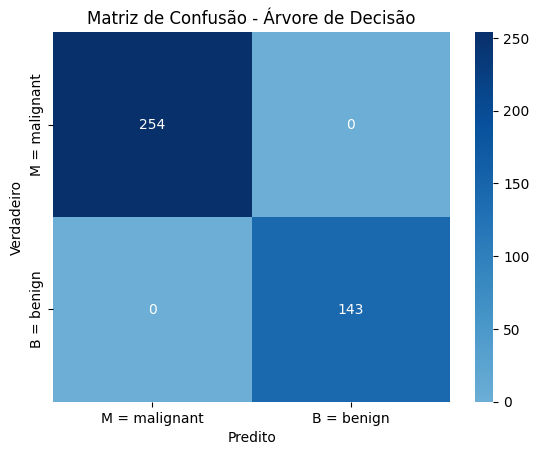


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       254
           M       1.00      1.00      1.00       143

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397


-------------------------------------------------------



In [65]:
getResults(train_scaled, y_train_scaled, arv, model_name='arv')

#### **Conjunto de teste**

---



In [66]:
arv = DecisionTreeClassifier(max_depth=5, criterion='entropy') #critério que o algorimo está usando entropia
arv.fit(test_scaled, y_test_scaled);
score = arv.score(test_scaled, y_test_scaled)
print(f'Accuracy no conjunto de treino: {score:.5f}')

Accuracy no conjunto de treino: 0.98830


Modelo: Árvore de Decisão
Acurácia: 0.9883040935672515 



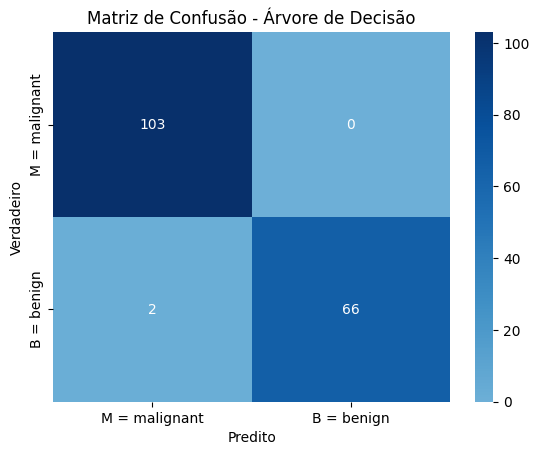


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       103
           M       1.00      0.97      0.99        68

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171


-------------------------------------------------------



In [69]:
getResults(test_scaled, y_test_scaled, arv, model_name='arv')

## **Bayesiano ingenuo**

---





## **Regressão logística**

---




O processo de treinamento do modelo de regressão logística envolve a utilização de um conjunto de dados de treinamento, do kaggle, que inclui informações sobre a ocorrência de dor nas costas a partir de 12 variáveis ​​explicativas associadas a cada indivíduo. O modelo é ajustado aos dados de treinamento e, em seguida, é avaliado usando um conjunto de dados de teste separado para verificar a precisão das previsões.

A linguagem de programação Python será usada para implementar esse modelo de regressão logística. A biblioteca Scikit-learn será a principal ferramenta que será usada para prover as previsões.

O método de regressão logistica será usado como técnica para dizer se o modelo converge ou diverge, baseado no conjunto de dados fornecido, que consite em um **método linear generalizado (MLG)**.

> Nelder, John; Wedderburn, Robert (1972). Generalized Linear Models. Blackwell Publishing. Journal of the Royal Statistical Society. Series A (General). 135: 370–384. JSTOR 2344614. doi:10.2307/2344614

Os MLGs propõem a modelagem para variáveis na família exponencial de distribuições, que inclui:

* Binomial (Bernoulli) [link](https://www.laboneconsultoria.com.br/distribuicao-binomial/)
* Poisson [link](https://www.scribbr.com/statistics/poisson-distribution/)
* Normal [link](https://en.wikipedia.org/wiki/Normal_distribution)
* Binomial Negativa [link](https://en.wikipedia.org/wiki/Negative_binomial_distribution)
* Gama  [link](https://en.wikipedia.org/wiki/Gamma_distribution)
* Gaussiana Inversa [link](https://en.wikipedia.org/wiki/Inverse_Gaussian_distribution)
* outras


#### **O modelo de regressão logística:**

Um dos modelos lineares mais utilizados é o modelo de regressão logística.

Neste modelo, consideramos

$$ Y_i = \left \{ \begin{matrix} 1, & \mbox{se }\mbox{ o indivíduo i possui determinada característica} \\ 0, & \mbox{se }\mbox{ caso contrário} \end{matrix} \right. $$

Supondo que $$P(X_i|Y_i) = π(X_i)$$ e que $$log\left ( \dfrac{π(x)}{1-π(x)} \right ) = α + βx $$

e queremos estimar os parâmetros $α$ e $β$ para compreender como $X_i$ e $Y_i$ estão associados.

Suponha que $X_i = 1$ indique que o indivíduo $i$ possui um fator de risco para um a dor nas costas (indicada por $Y_i = 1)$
e foram observados $n_1$ indivíduos com a presença deste fator, e $n_2$ indivíduos sem a presença deste fator ($X_i = 0)$
.

Para os indivíduos que possuiam o fator, a chance de desenvolvimento da doença fica:

$$\left ( \dfrac{π(1)}{1-π(1)} \right ) = e^{(α + βx)} $$

enquanto que a chance de desenvolvimento da doença no indivíduo com ausência do fator é

$$\left ( \dfrac{π(0)}{1-π(0)} \right ) = e^{α} $$

A razão de chances nesse caso fica

$$  ϕ =  \dfrac{π(1)/(1-π(1))}{π(0)/(1-π(0))} = e^{β} $$




Portanto, são esses parametros e equações que estarão abstraidos no modelo

#### **A qualidade do ajuste**


A qualidade do ajuste pode ser avaliada com

* [Análise de diagnóstico](https://datascience.eu/pt/aprendizado-de-maquina/entendendo-a-curva-auc-roc)*
* [Resíduos ordinários](https://www.freecodecamp.org/portuguese/news/tipos-de-dados-em-estatistica-tipos-de-dados-nominais-ordinais-intervalares-e-proporcionais-explicados-com-exemplos/),
* [Resíduos studentizados](https://storopoli.github.io/Estatistica/7-Regressao_Logistica.html),
* [Pontos de alavanca](https://pt.wikipedia.org/wiki/Ponto_de_alavanca_(estat%C3%ADstica)),
* [Distância de Cook](https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_de_Cook)
* Envelopes para os resíduos ([disponível em R )](https://www.ime.usp.br/~giapaula)
* Deviance [(função desvio)](https://www.ime.usp.br/~giapaula/texto_2013.pdf)
* Resíduo componente do desvio


**Métricas de ajuste**

* Erro absoluto médio
* Erro quadrático médio
* Raiz do erro quadrático médio


### **Aplicando regressão sem pré-processamento**
 Hirperparametros padrão:

In [45]:
# por que test_size = 0.3, pelo fato de que isso nos dá 70% da base para treino
# e 30% para test como pedido nas especificações
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Regressão Logística
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train);


lr_predictions = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
# Conjunto de teste
print("Acurácia (Regressão Logística):", lr_accuracy)

Acurácia (Regressão Logística): 0.6023391812865497


#### Conjunto de teste

---



Modelo: Regressão Logística
Acurácia: 0.6023391812865497 



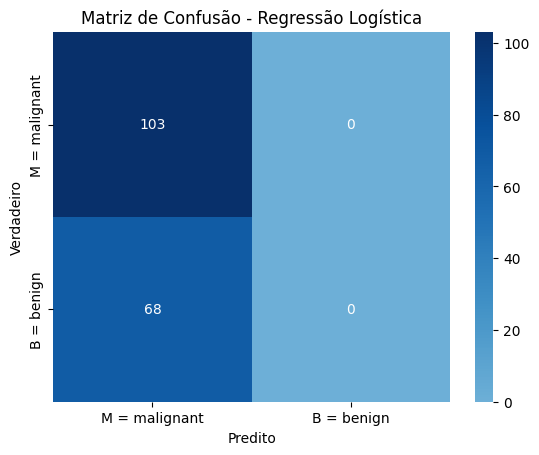


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.60      1.00      0.75       103
           M       0.00      0.00      0.00        68

    accuracy                           0.60       171
   macro avg       0.30      0.50      0.38       171
weighted avg       0.36      0.60      0.45       171


-------------------------------------------------------



In [5]:
# Matriz de confusão para o conjunto de teste
getResults(X_test, y_test, lr_clf, model_name='reglog')

#### **Conjunto de treino**

---



Modelo: Regressão Logística
Acurácia: 0.6397984886649875 



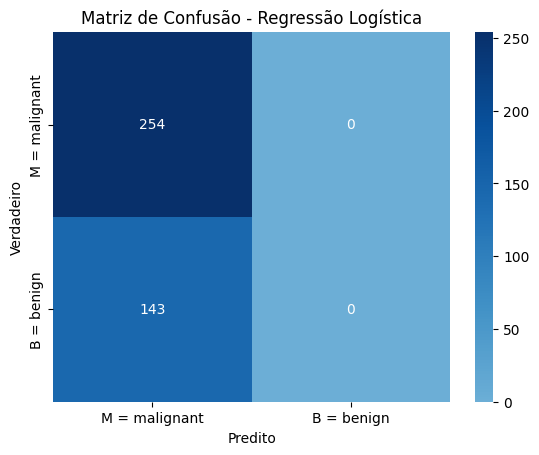


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.64      1.00      0.78       254
           M       0.00      0.00      0.00       143

    accuracy                           0.64       397
   macro avg       0.32      0.50      0.39       397
weighted avg       0.41      0.64      0.50       397


-------------------------------------------------------



In [6]:
# Matriz de confusão para o conjunto de teste
getResults(X_train, y_train, lr_clf, model_name='reglog')

#### **Aplicando Oversampling no conjunto de treino**

---

In [34]:
mean_accuracy_without_smote = cross_validation(log, X_train, y_train)
print(mean_accuracy_without_smote)
print()
mean_accuracy_with_smote = cross_validation(log, X_train, y_train, oversampling=True)
mean_accuracy_with_smote

Accuracy do split 0: 0.65
Accuracy do split 1: 0.6
Accuracy do split 2: 0.75
Accuracy do split 3: 0.75
Accuracy do split 4: 0.625
Accuracy do split 5: 0.625
Accuracy do split 6: 0.65
Accuracy do split 7: 0.5641025641025641
Accuracy do split 8: 0.6410256410256411
Accuracy do split 9: 0.5384615384615384
0.6393589743589744

Accuracy do split 0: 0.65
Accuracy do split 1: 0.4
Accuracy do split 2: 0.25
Accuracy do split 3: 0.25
Accuracy do split 4: 0.375
Accuracy do split 5: 0.375
Accuracy do split 6: 0.35
Accuracy do split 7: 0.4358974358974359
Accuracy do split 8: 0.358974358974359
Accuracy do split 9: 0.46153846153846156


0.39064102564102565

### **Aplicando regressão com pré-processamento**
 Hirperparametros modificados:

In [9]:
# dados normalizados
train_scaled, test_scaled, y_train_scaled, y_test_scaled = data_preprocess(X, y)

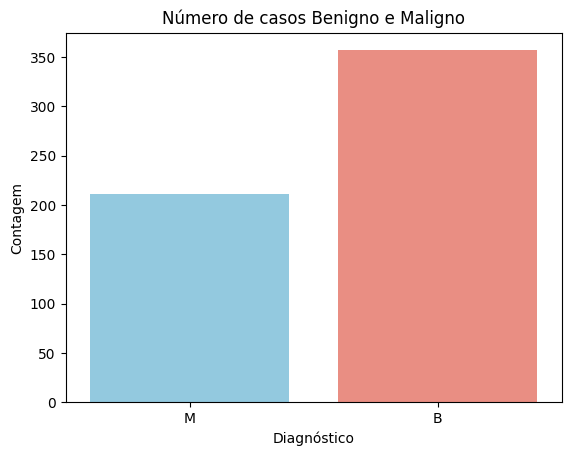

In [7]:

# Visualize o número de casos Benignos e Malignos
showBalance(target="Diagnosis")

# Note que os dados estão relativamente balanceados, então caso haja aplicação de técnicas de
# balanceamento o ganho será pouco.


#### **Conjunto de treino**

---



In [35]:
log = LogisticRegression()
log.fit(train_scaled, y_train_scaled);
score = log.score(train_scaled, y_train_scaled)
print(f'Accuracy no conjunto de treino: {score:.5f}')

Accuracy no conjunto de treino: 0.98992


Modelo: Regressão Logística
Acurácia: 0.9899244332493703 



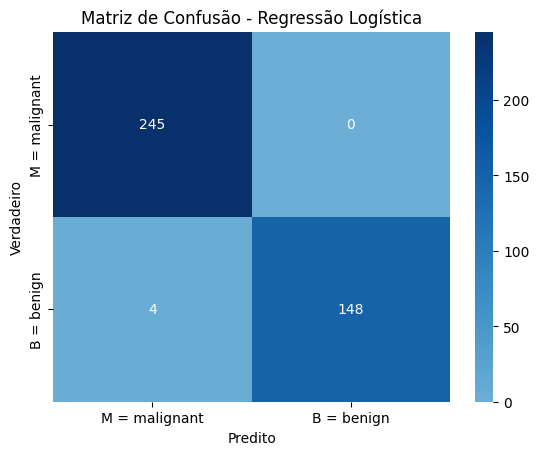


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       245
           M       1.00      0.97      0.99       152

    accuracy                           0.99       397
   macro avg       0.99      0.99      0.99       397
weighted avg       0.99      0.99      0.99       397


-------------------------------------------------------



In [36]:
getResults(train_scaled, y_train_scaled, log, model_name='reglog')

#### **Conjunto de teste**

---



In [14]:
log = LogisticRegression()
log.fit(train_scaled, y_train_scaled);
score = log.score(test_scaled, y_test_scaled)
print(f'Accuracy no conjunto de teste: {score:.5f}')

Accuracy no conjunto de teste: 0.97661


Modelo: Regressão Logística
Acurácia: 0.9766081871345029 



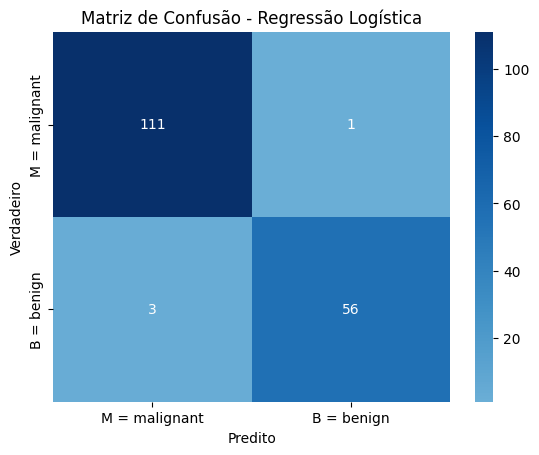


############___Relatório de Classificação___############:

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       112
           M       0.98      0.95      0.97        59

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171


-------------------------------------------------------



In [15]:
getResults(test_scaled, y_test_scaled, log, model_name='reglog')

## **K-vizinhos**

---


